In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
predicted_tweets = pd.read_json("Data/turkish_tweets_labels_protest_violence_predicted_20_08_2018.json")

In [3]:
predicted_tweets.columns

Index(['id', 'created_at', 'text', 'coordinates', 'place', 'user',
       'proccd_text', 'protest', 'non_pro_prob', 'pro_prob', 'violence',
       'non_vio_prob', 'vio_prob'],
      dtype='object')

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


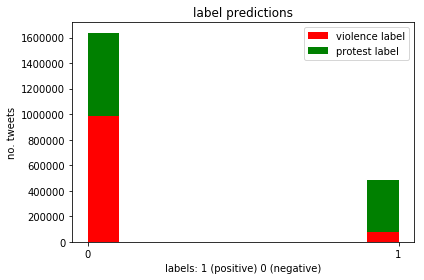

In [12]:
colors = ['red', 'green']
labels = ['violence label', 'protest label']

plt.hist([predicted_tweets['violence'], predicted_tweets['protest']],stacked=True,normed=0,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('label predictions')
plt.xlabel("labels: 1 (positive) 0 (negative)")
plt.ylabel("no. tweets")
plt.xticks([0,1])
plt.tight_layout()
plt.show()

In [27]:
print("no. protest(pos)", len(predicted_tweets[predicted_tweets['protest'] == 1]))
print((len(predicted_tweets[predicted_tweets['protest'] == 1])/ len(predicted_tweets))*100)
print("no. protest(neg)", len(predicted_tweets[predicted_tweets['protest'] == 0]))
print((len(predicted_tweets[predicted_tweets['protest'] == 0])/ len(predicted_tweets))*100)
print("no. violence(pos)", len(predicted_tweets[predicted_tweets['violence'] == 1]))
print((len(predicted_tweets[predicted_tweets['violence'] == 1])/ len(predicted_tweets))*100)
print("no. violence(neg)", len(predicted_tweets[predicted_tweets['violence'] == 0]))
print((len(predicted_tweets[predicted_tweets['violence'] == 0])/ len(predicted_tweets))*100)

no. protest(pos) 405673
38.24524023889546
no. protest(neg) 655042
61.75475976110454
no. violence(pos) 78435
7.394540475056919
no. violence(neg) 982280
92.60545952494309


In [11]:
protest_predicted = predicted_tweets[predicted_tweets["protest"] == 1]

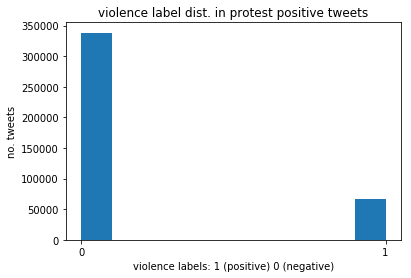

In [14]:
plt.hist(protest_predicted['violence'])
plt.xlabel("violence labels: 1 (positive) 0 (negative)")
plt.ylabel("no. tweets")
plt.xticks([0,1])
plt.title("violence label dist. in protest positive tweets")
plt.show()

In [24]:
print("no. violence(pos) in protest pos tweets", len(protest_predicted[protest_predicted['violence'] == 1]))
print((len(protest_predicted[protest_predicted['violence'] == 1])/ len(protest_predicted))*100)
print("no. violence(neg) in protest pos tweets", len(protest_predicted[protest_predicted['violence'] == 0]))
print((len(protest_predicted[protest_predicted['violence'] == 0])/ len(protest_predicted))*100)

no. violence(pos) in protest pos tweets 67319
16.594399923090766
no. violence(neg) in protest pos tweets 338354
83.40560007690924


In [20]:
non_protest_predicted = predicted_tweets[predicted_tweets["protest"] == 0]

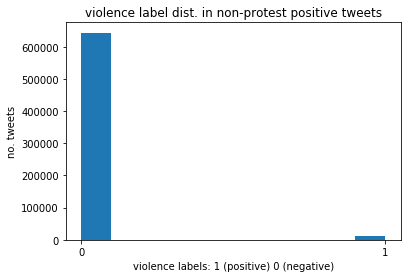

In [21]:
plt.hist(non_protest_predicted['violence'])
plt.xlabel("violence labels: 1 (positive) 0 (negative)")
plt.ylabel("no. tweets")
plt.xticks([0,1])
plt.title("violence label dist. in non-protest positive tweets")
plt.show()

In [25]:
print("no. violence(pos) in protest pos tweets", len(non_protest_predicted[non_protest_predicted['violence'] == 1]))
print((len(non_protest_predicted[non_protest_predicted['violence'] == 1])/ len(non_protest_predicted))*100)
print("no. violence(neg) in protest pos tweets", len(non_protest_predicted[non_protest_predicted['violence'] == 0]))
print((len(non_protest_predicted[non_protest_predicted['violence'] == 0])/ len(non_protest_predicted))*100)

no. violence(pos) in protest pos tweets 11116
1.6969904219882082
no. violence(neg) in protest pos tweets 643926
98.3030095780118


In [29]:
predicted_tweets["created_at_dt"] = pd.to_datetime(predicted_tweets["created_at"])

In [30]:
predicted_tweets_dt = predicted_tweets.set_index(predicted_tweets["created_at_dt"])

In [31]:
predicted_tweets_dt["created_at_dt"].describe()

count                 1060715
unique                 774047
top       2013-06-25 20:05:49
freq                       12
first     2013-05-31 13:08:02
last      2013-06-26 08:08:31
Name: created_at_dt, dtype: object

In [32]:
len(predicted_tweets_dt.resample("D"))

27

In [33]:
len(predicted_tweets_dt.resample("H"))

620

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  
/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.
/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


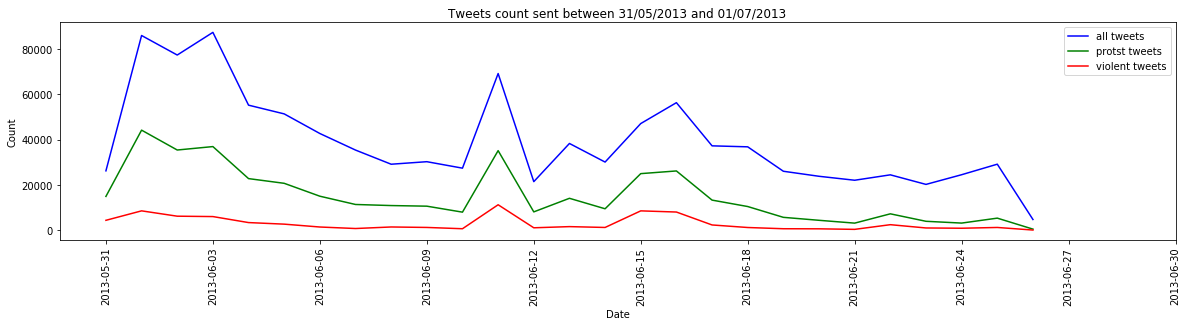

In [50]:
plt.figure(1, figsize=(20,4))
plt.plot(predicted_tweets_dt['id'].resample("D", how='count'), color= "blue", label ="all tweets")

plt.plot(predicted_tweets_dt[predicted_tweets_dt['protest']==1]["id"].resample("D", how='count'), color="green", label ="protst tweets")

plt.plot(predicted_tweets_dt[predicted_tweets_dt['violence']==1]['id'].resample("D", how='count'), color="red", label="violent tweets")
ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
plt.xticks(ticks,ticks, rotation='vertical')
plt.title("Tweets count sent between 31/05/2013 and 01/07/2013")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """


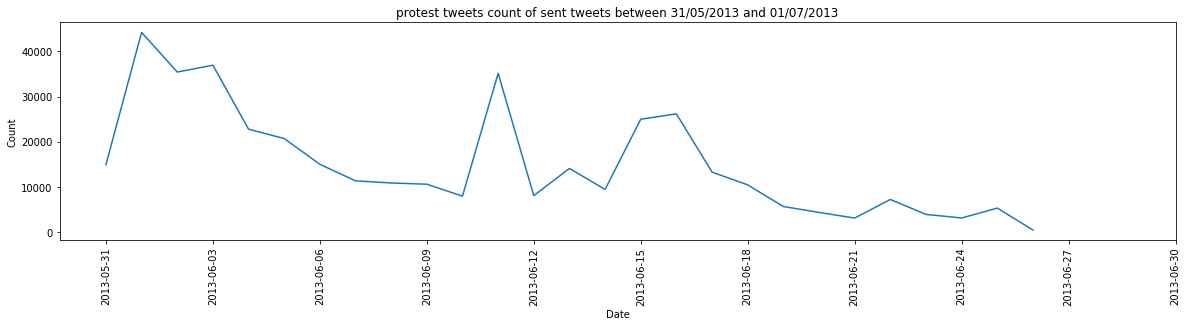

In [58]:


plt.figure(figsize=(20,4))

plt.plot(predicted_tweets_dt[predicted_tweets_dt['protest']==1]['id'].resample("D", how='count'))
ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
plt.xticks(ticks,ticks, rotation='vertical')
plt.title("protest tweets count of sent tweets between 31/05/2013 and 01/07/2013")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


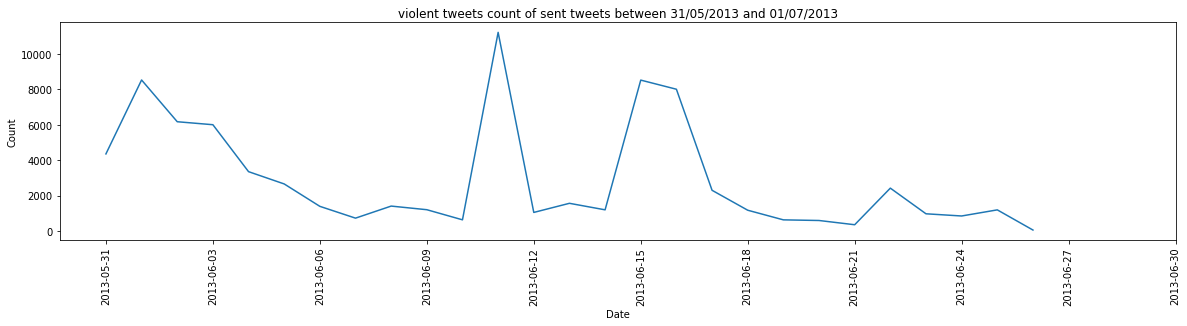

In [51]:

plt.figure(figsize=(20,4))

plt.plot(predicted_tweets_dt[predicted_tweets_dt['violence']==1]['id'].resample("D", how='count'))
ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
plt.xticks(ticks,ticks, rotation='vertical')
plt.title("violent tweets count of sent tweets between 31/05/2013 and 01/07/2013")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  
/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.
/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


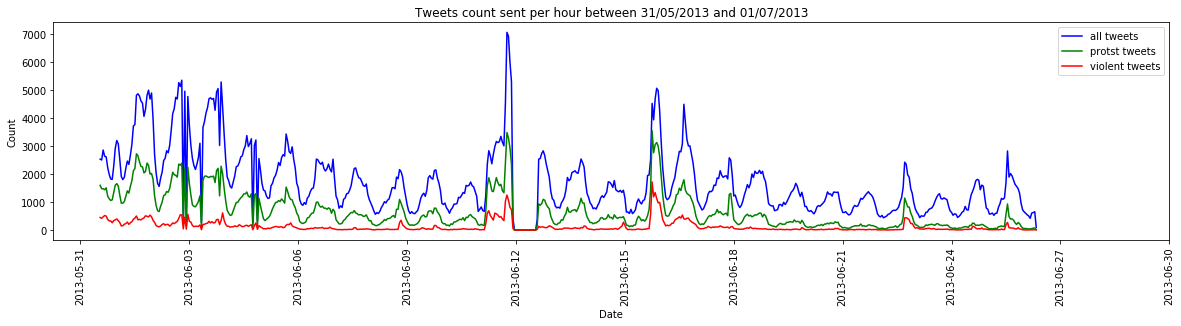

In [54]:
plt.figure(1, figsize=(20,4))
plt.plot(predicted_tweets_dt['id'].resample("H", how='count'), color= "blue", label ="all tweets")

plt.plot(predicted_tweets_dt[predicted_tweets_dt['protest']==1]["id"].resample("H", how='count'), color="green", label ="protst tweets")

plt.plot(predicted_tweets_dt[predicted_tweets_dt['violence']==1]['id'].resample("H", how='count'), color="red", label="violent tweets")
ticks = ['2013-05-31', '2013-06-03','2013-06-06','2013-06-09','2013-06-12','2013-06-15','2013-06-18','2013-06-21','2013-06-24','2013-06-27','2013-06-30']
plt.xticks(ticks,ticks, rotation='vertical')
plt.title("Tweets count sent per hour between 31/05/2013 and 01/07/2013")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


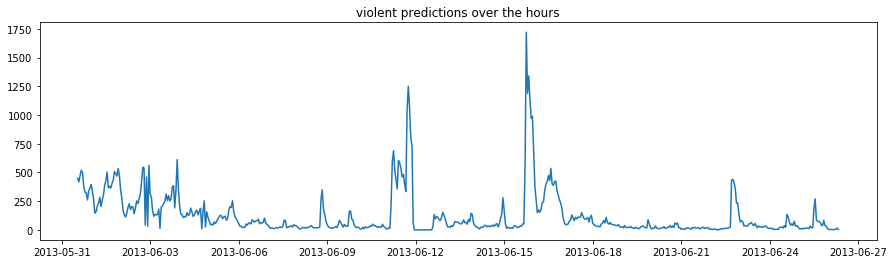

In [53]:
plt.figure(figsize=(15,4))

plt.plot(predicted_tweets_dt[predicted_tweets_dt['violence']==1]["id"].resample("H", how='count'))
plt.title("violent predictions over the hours")
plt.show()